# Bank Churn Prediction
## Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

### Data Dictionary

- CustomerId: Unique ID which is assigned to each customer
- Surname: Last name of the customer 
- CreditScore: It defines the credit history of the customer.  
- Geography: A customer’s location    
- Gender: It defines the Gender of the customer   
- Age: Age of the customer     
- Tenure: Number of years for which the customer has been with the bank
- NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
- Balance: Account balance
- HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
- EstimatedSalary: Estimated salary 
- isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
- Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    0=No ( Customer did not leave the bank )
                    1=Yes ( Customer left the bank )

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Introductory Steps**

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

### Loading the Data

In [3]:
Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Neural Netwoks/Churn (1).csv')

In [4]:
# Checking the number of rows and columns in the data
Data.shape

(10000, 14)

- The dataset has 10000 rows and 14 columns

### Data Overview

In [5]:
# Let's view the first 5 rows of the data
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Let's view the last 5 rows of the data
Data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
# Let's check the datatypes of the columns in the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- There are 10000 observations and 14 columns in the data.
- 11 columns are of numerical datatype and 3 columns are the object.
- The columns :'RowNumber','CustomerId' and 'Surname' are unique to each customer.

In [8]:
# Let's check for duplicate values in the data
Data.duplicated().sum()

0

- There are no duplicate observations in the data.

In [9]:
# Let's check for missing values in the data
round(Data.isnull().sum() / Data.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

- There are no missing values found in the data.

In [10]:
Data["Exited"].value_counts(1)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [11]:
# Let's view the statistical summary of the numerical columns in the data
round(Data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.0,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48


- `RowNumber` and `CustomerId` columns are unique to each customer, it will not help us in our prediction. so both the columns should be dropped.
- `Exited` column is our target column. It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 0 or 1.


###  Eliminating the unique features from the dataset
- Dropping the columns `RowNumber`, `CustomerId` and `Surname` as they are unique to each customer. 
- It will not add value to the modeling.

In [12]:
# Dropping `RowNumber`,`CustomerId` and `Surname` columns consists of unique features and hence will not add value to the modeling
Data.drop(columns=["RowNumber",'CustomerId','Surname'], inplace=True)

In [13]:
Data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [14]:
# Let's check the number of unique values in each column
Data.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [15]:
for i in Data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(Data[i].value_counts(normalize=True))
    print("*" * 50)

Unique values in Geography are :
France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64
**************************************************
Unique values in Gender are :
Male      0.5457
Female    0.4543
Name: Gender, dtype: float64
**************************************************


- The `Geography` column has 3 unique categories, France has the highest number of customers with the bank(50%) followed by Germany and Spain with equal number of customers.
- The `Gender` columns shows that there are 54% of male customers and 45% of female customers. The Bank has more male customers than female customers.

In [16]:
for i in Data.describe(include=np.number).columns:
    print("Unique values in", i, "are :")
    print(Data[i].value_counts(normalize=True))
    print("*" * 50)

Unique values in CreditScore are :
850    0.0233
678    0.0063
655    0.0054
705    0.0053
667    0.0053
        ...  
404    0.0001
351    0.0001
365    0.0001
417    0.0001
419    0.0001
Name: CreditScore, Length: 460, dtype: float64
**************************************************
Unique values in Age are :
37    0.0478
38    0.0477
35    0.0474
36    0.0456
34    0.0447
       ...  
92    0.0002
82    0.0001
88    0.0001
85    0.0001
83    0.0001
Name: Age, Length: 70, dtype: float64
**************************************************
Unique values in Tenure are :
2     0.1048
1     0.1035
7     0.1028
8     0.1025
5     0.1012
3     0.1009
4     0.0989
9     0.0984
6     0.0967
10    0.0490
0     0.0413
Name: Tenure, dtype: float64
**************************************************
Unique values in Balance are :
0.00         0.3617
130170.82    0.0002
105473.74    0.0002
85304.27     0.0001
159397.75    0.0001
              ...  
81556.89     0.0001
112687.69    0.0001
108698.96 

- `NumOfProducts`:
  - 50% of the customers are using 1 product with the bank
  - 45% of the customers are using 2 products with the bank
  - less than 3% of the customers using more than 2 products.
- `HasCrCard`:
  - It is a categorical variable that decides whether the customer has a credit card or not.
  - 70% of the customers has credit card with the bank.
- `IsActiveMember`:
  - It is a categorical variable that decides whether the customer is an active member of the bank or not.
  - ~52% of the customers are active and doing regular transactions with the bank. 
- `Exited`:
  - It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 0 or 1.
  - ~80% of the customers did not leave the bank
  - 20% of the customers left the bank.

## **Exploratory Data Analysis on the data**

### Univariate Analysis

In [17]:
# Function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

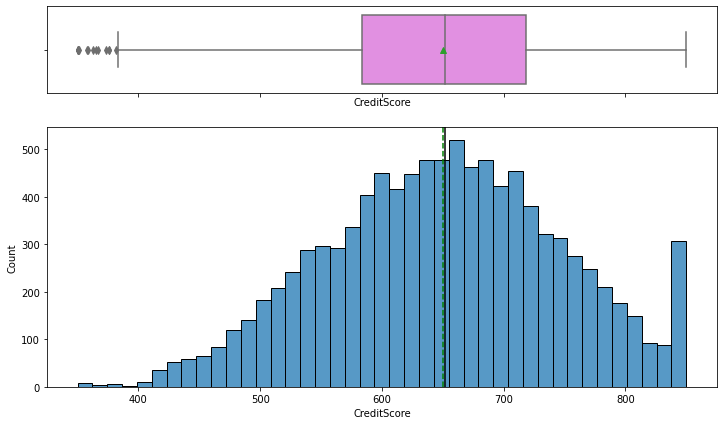

In [18]:
histogram_boxplot(Data, "CreditScore")

- The distribution of 'CreditScore' column is skewed towards left and outliers are found, this indicates that few customers have have credit score less than 400.
- Most of the customers have credit score in range of 580 to 720.

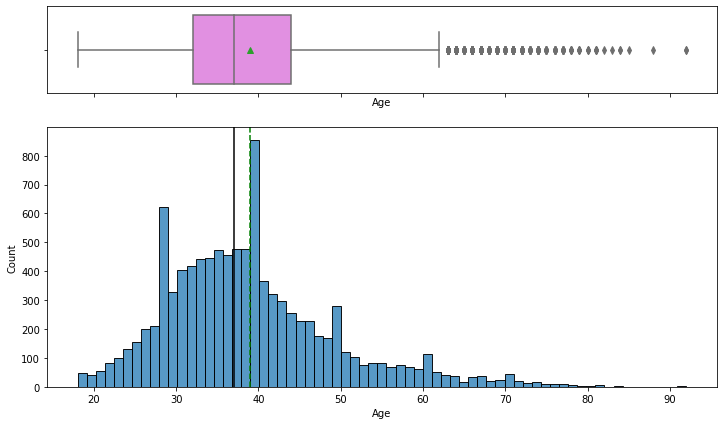

In [19]:
histogram_boxplot(Data, "Age")

- The distribution of the Age column is skewed towards right. Customers of age above 62 are outliers.
- Most of the customer's age in range of 32 to 42 years. The average age of the customers is 38 years.

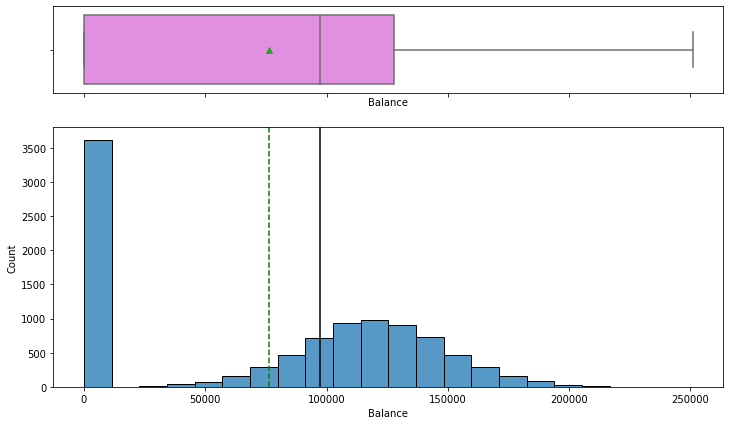

In [20]:
histogram_boxplot(Data, "Balance")

- 3500 customers has balance less than 10000. 


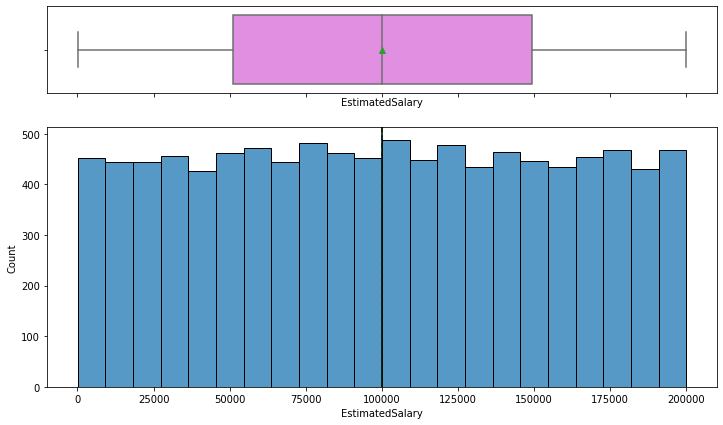

In [21]:
histogram_boxplot(Data, "EstimatedSalary")

- Most of the customer have estimated salary in the range of 50k to 150k with an average estimated salary of 100k.

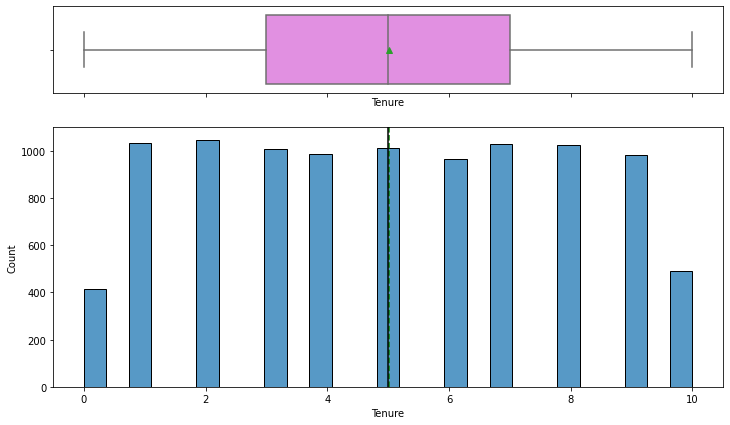

In [22]:
histogram_boxplot(Data, "Tenure")

- Most of the customers have 3 to 7 years of relationship with the bank with an average of 5 years.

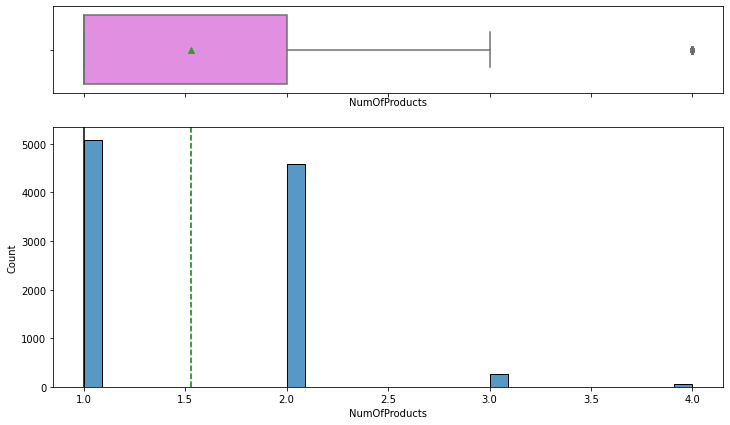

In [23]:
histogram_boxplot(Data, "NumOfProducts")

- Most of the customers have 1 to 2 products of the bank.

In [24]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [25]:
Data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

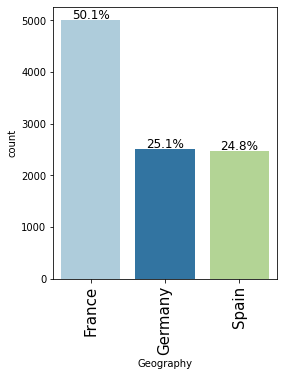

In [26]:
labeled_barplot(Data, "Geography", perc=True)

- 50% of the customers are from France followed by Germany and Spain with 25% of customers each.

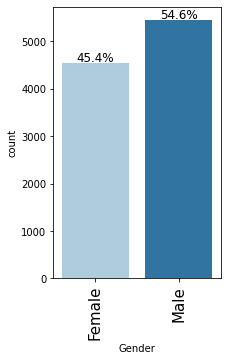

In [27]:
labeled_barplot(Data, "Gender", perc=True)

- Approximately 55% of the customers are male and 45% of the customers are female.

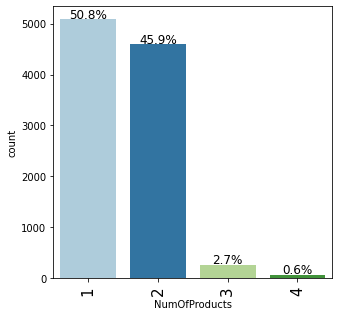

In [28]:
labeled_barplot(Data, "NumOfProducts", perc=True)

- Most of the customers have 1 or 2 products with the bank.
- less than 4% of the customers have more than 2 products.

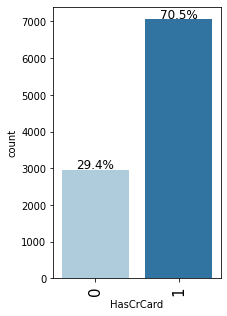

In [29]:
labeled_barplot(Data, "HasCrCard", perc=True)

- 70.5% of the customers has credit cards.

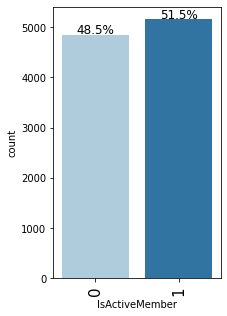

In [30]:
labeled_barplot(Data, "IsActiveMember", perc=True)

- 51.5% customers are active members.

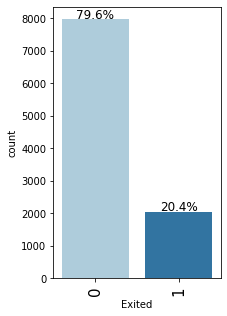

In [31]:
labeled_barplot(Data, "Exited", perc=True)

- 79.6% of the customers did not leave the bank.
- 20.4% of the customers left the bank.

0    7963
1    2037
Name: Exited, dtype: int64


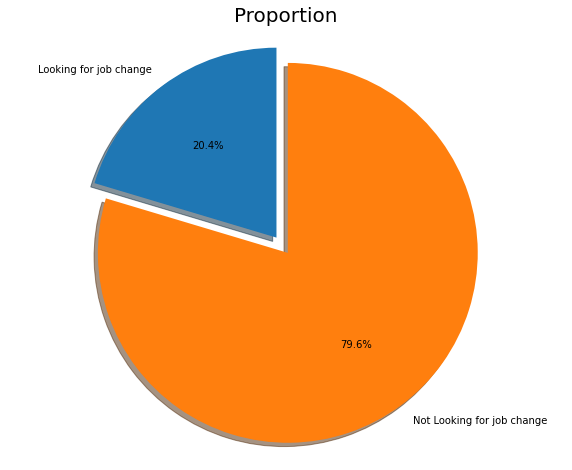

In [32]:
print(Data.Exited.value_counts())
labels = 'Looking for job change', 'Not Looking for job change'
#sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [Data.Exited[Data['Exited']==1].count(),Data.Exited[Data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

* This pie chart shows that the actual distribution of classes is itself imbalanced for the target variable.
* Only ~20% of the customers in this dataset are actually left the bank.

Hence, this dataset and problem statement represent an example of Imbalanced Classification, which has unique challenges in comparison to performing classification over balanced target variables.

### Bivariate Analysis

In [33]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

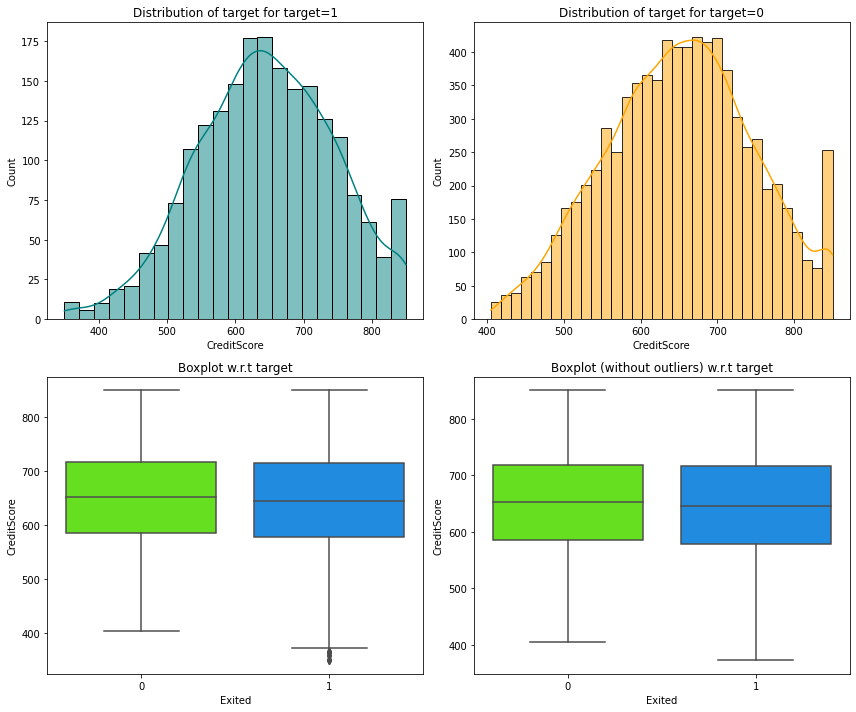

In [34]:
distribution_plot_wrt_target(Data, "CreditScore", "Exited")

- Credit score of the customers who left and who does not left the bank are same.

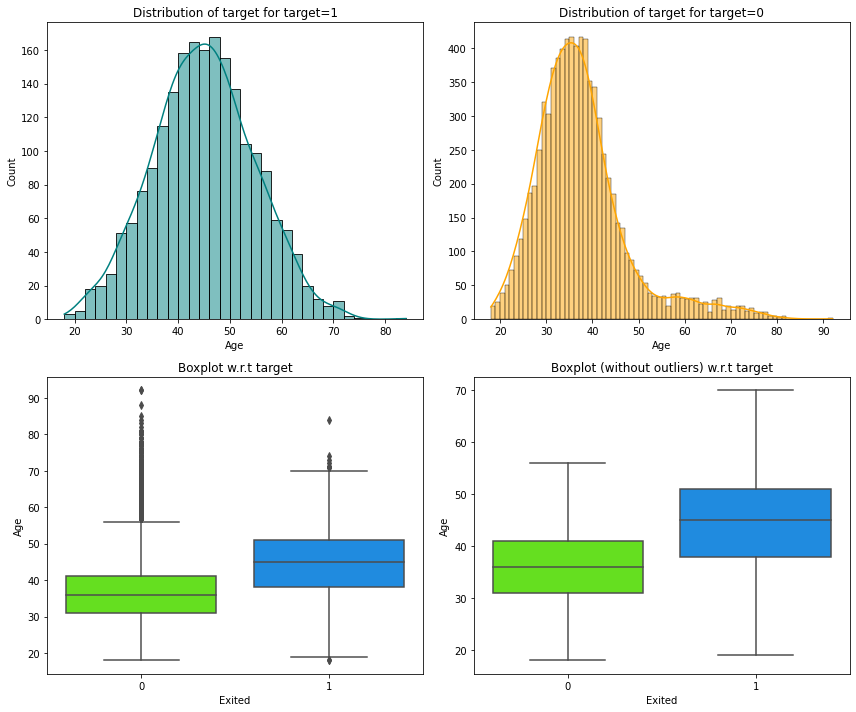

In [35]:
distribution_plot_wrt_target(Data, "Age", "Exited")

- The Age distribution of cutomers who left the bank looks normal while the Age distribution of customers who are with the bank has right skewed distribution.
- Most of the customers age who left bank are in the range of 38 to 50 years.

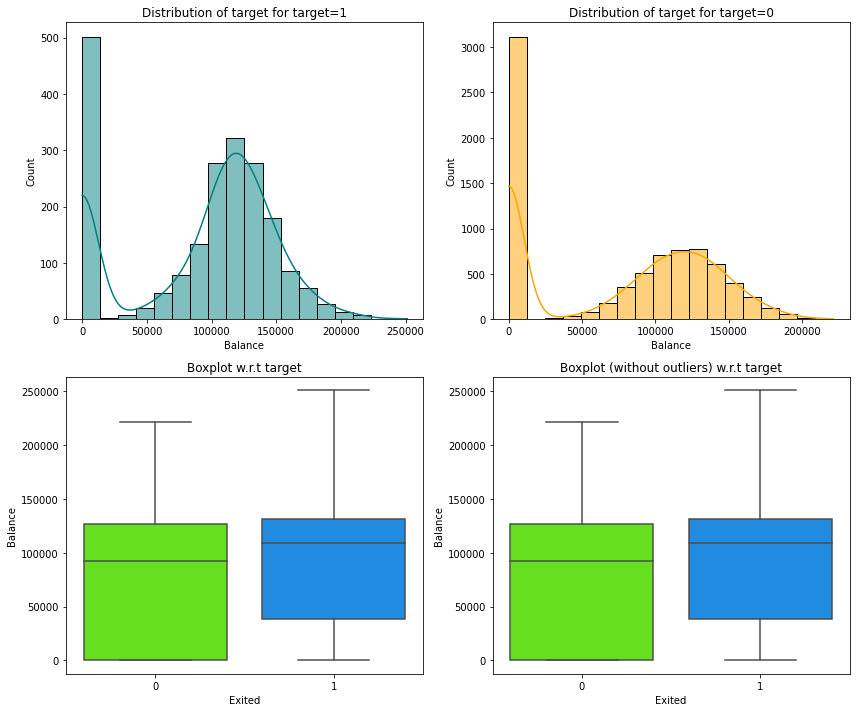

In [36]:
distribution_plot_wrt_target(Data, "Balance", "Exited")

- The customers with high balance churn the most. The bank is losing customers with significant bank balances which are likely to hit their available capital for lending.



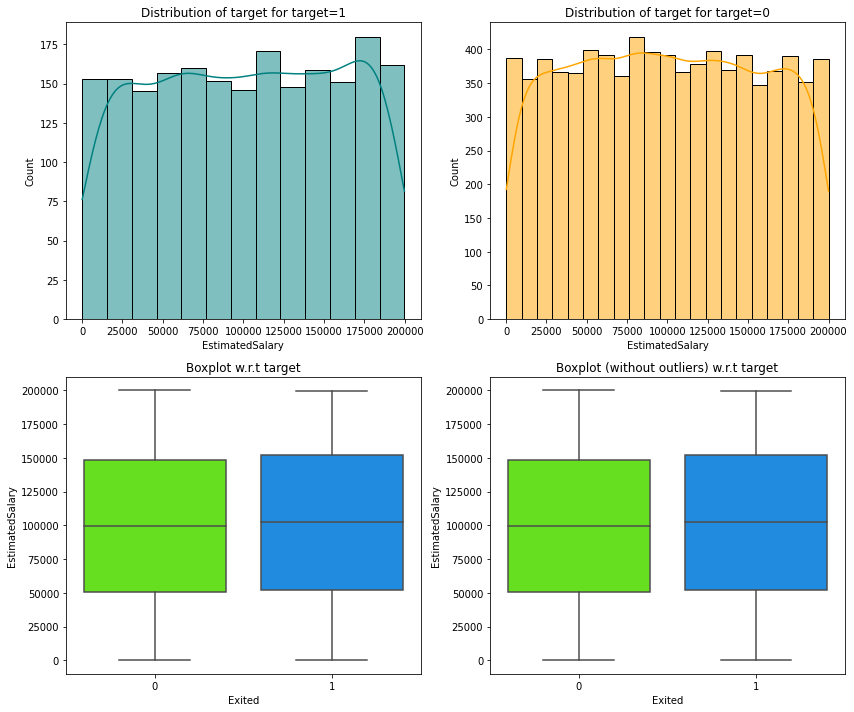

In [37]:
distribution_plot_wrt_target(Data, "EstimatedSalary", "Exited")

- Estimated Salary does not affect the Bank Churn.

In [38]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [39]:
Data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


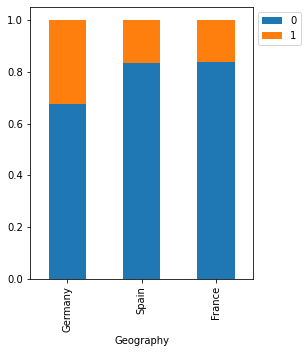

In [40]:
stacked_barplot(Data, "Geography", "Exited")

- Customers from Germany left the bank more when compared with spain and France.

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


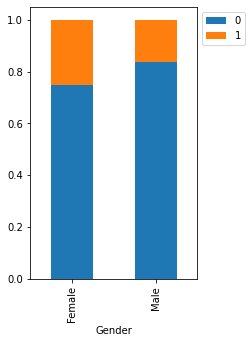

In [41]:
stacked_barplot(Data, "Gender", "Exited")

- Female customers left the bank more than male customers.

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


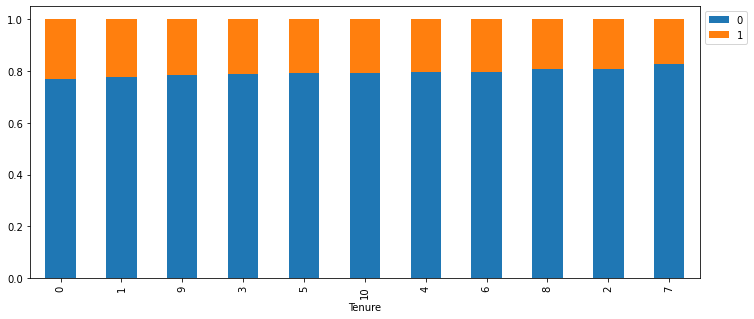

In [42]:
stacked_barplot(Data, "Tenure", "Exited")

- Churning rate does not depends on Tenure of the customer. Customers with in all tenure tends to churn.

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


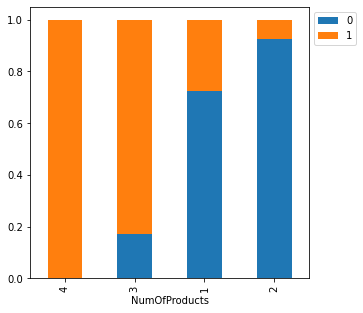

In [43]:
stacked_barplot(Data, "NumOfProducts", "Exited")

- The customer with more than 2 products with bank churn the most.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


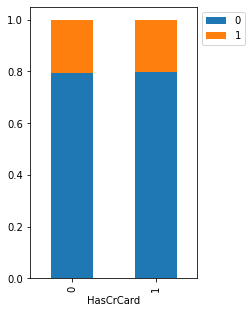

In [44]:
stacked_barplot(Data, "HasCrCard", "Exited")

- The churning rate of the customers does not depends on credit card.

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


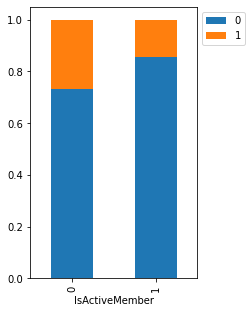

In [45]:
stacked_barplot(Data, "IsActiveMember", "Exited")

- The customers who are not active churn the most.

## Insights based on EDA
### Summary of the Dataset:
- There are 10000 observations and 14 columns in the data. Out of 14 columns: 11 columns are of numerical datatype and 3 columns are the object. The columns :'RowNumber','CustomerId' and 'Surname' are unique to each customer.
- Dropped the columns RowNumber, CustomerId and Surname as they are unique to each customer and it will not add value to the modeling.
- 50% of the customers are from Germany.
- There are more number of Male customers than Female customers.
- Approximately 95% of the customers have products not more not 2. Only less than 5% of the customers use 3 to 4 products.
- 'Exited' is our target variable with 20% of the dataset left the bank.

### Insights from EDA
- The actual distribution of classes is itself imbalanced for the target variable 'Exited'. Only ~20% of the customers in this dataset are actually left the bank.
- Customers with the age of 38 years to 50 years left the bank most than young customers.
- Account Balance of the churned customers are high.
- Churning rate does not depends on Credit Score and EstimatedSalary.
- Customers from Germany left the bank most.
- Female customers left the bank most than male customers.
- Neither Tenure of the customer or customers with or without credit card has significant effect on churn.
- Customer who has more products with the bank left the bank most.
- Customer who are not active churn the most.

## Data Preparation

In [46]:
Data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


This dataset contains both numerical and categorical variables. We need to treat them before we pass them onto the neural network. We will perform the below pre-processing steps: 
*   One hot encoding of categorical variables
*   Scaling numerical variables

An important point to remember: Before we scale numerical variables, we would first split the dataset into train and test datasets and perform scaling separately. Otherwise, we would be leaking information from the test data to the train data and the resulting model might give a false sense of good performance. This is known as **data leakage** which we would like to avoid.

In [47]:
# Creating one-hot encoding for the column - "Geography",'Gender' and then dropping them
one_hot_data = pd.concat([Data, pd.get_dummies(Data[["Geography",'Gender']])], axis = 1)

one_hot_data = one_hot_data.drop(columns = ["Geography",'Gender'])

one_hot_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


Now, let's split the dataset into train and test datasets. To do that, we would be extracting all the **independent variables** and saving them into a variable **features**. And the target variable **Exited** would be saved into a variable **target**. These two variables will be used to split the parent dataset into train and test datasets.

In [48]:
features = one_hot_data.drop(['Exited'], axis = 1)

target = one_hot_data['Exited']

In [49]:
# Splitting the dataset into the train and the test data
X_train, X_test, y_train, y_test =  train_test_split(features, target, test_size = 0.2, random_state = 42)

Now, we will perform scaling on the numerical variables separately for train and test sets. We will perform **fit** and **transform** on the train data and then we will only perform **transform** on the test data. 

In [50]:
# library to import to standardize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Here, we are passing all the features (numerical and categorical), that's okay as min-max scaler will not change values of categorical variables
X_train_normalized = scaler.fit_transform(X_train)

In [51]:
X_test_normalized = scaler.transform(X_test)

In [52]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,1,0,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,0,1,0,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,0,1,0,1
6087,561,27,9,135637.00,1,1,0,153080.40,1,0,0,1,0
6669,517,56,9,142147.32,1,0,0,39488.04,1,0,0,0,1


In [53]:
# Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


## Model Building

### Model evaluation criterion
### Model can make wrong predictions as:
1. Predicting a customer will churn and the customer doesn't churn
2. Predicting a customer will not churn and the customer churn

### Which case is more important?
- Predicting that customer will not churn but the customer churns i.e. losing on a valuable customer or asset.

### How to reduce this loss i.e need to reduce False Negatives?
- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of churn.

### Model 1

Let's build a feed-forward neural network with 2 hidden layers and the output layer

In [54]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [55]:
# Initializing the ANN
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim = 13, units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid')) 

Once we are done with the model architecture, we need to compile the model, where we need to provide the loss function that we want to optimize, the optimization algorithm, and the evaluation metric that we are interested in to evaluate the model.

Since this is a binary classification task, we will be minimizing the **binary_crossentropy** and we can choose one optimizer out of 
1.   SGD
2.   RMSprop
3.   Adam

This is a hyper-parameter, with these optimizers to check which one performs better with a particular data.

For now, let's try **SGD** optimizer with **accuracy** as the metric and see the model's summary.

In [56]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [58]:
history=model.fit(X_train_normalized, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5393 - accuracy: 0.7842 - val_loss: 0.4968 - val_accuracy: 0.7987
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4998 - accuracy: 0.7934 - val_loss: 0.4861 - val_accuracy: 0.7987
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4918 - accuracy: 0.7934 - val_loss: 0.4785 - val_accuracy: 0.7987
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.7934 - val_loss: 0.4724 - val_accuracy: 0.7987
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7934 - val_loss: 0.4677 - val_accuracy: 0.7987
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.7934 - val_loss: 0.4640 - val_accuracy: 0.7987
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7934 - val_loss: 0.4612 - val_accuracy: 0.7987
Epoch 

63/63 [==============================] - 0s 3ms/step - loss: 0.4059 - accuracy: 0.8175


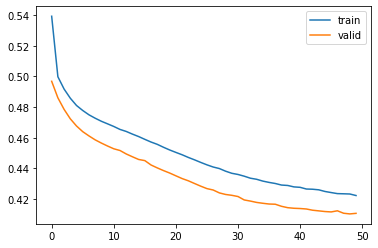

In [59]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test_normalized, y_test)

**Observations:**

- The training loss is smooth and overall it is decreasing with the increase in the epochs.
- The validation loss is decreasing and with the increase in the epochs.
- The validation loss is below to the training loss. This indicates that the model is giving a generalized performance.

Let's check the other metrices

In [60]:
y_pred=model.predict(X_test_normalized)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [61]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

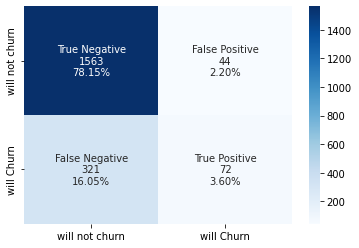

In [62]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'will not churn','will Churn']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**we gave 0.5 as the threshold to the model, and as this is an imbalanced dataset, we should calculate the threshold using the AUC-ROC curve.**

In [63]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1607
           1       0.62      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.73      0.58      0.59      2000
weighted avg       0.79      0.82      0.78      2000



As you can see, the above model has a good accuracy but a poor recall score and F1-score. This could be due to the imbalanced dataset.  

1) **Imbalanced dataset**: As you have seen in the EDA, this dataset is imbalanced, and it contains more examples that belong to the **0** class.

2) **Decision Threshold**: Due to the imbalanced dataset, we can use ROC-AUC to find the optimal threshold and use the same for prediction.


Let's try to change the optimizer, tune the decision threshold, increase the layers and configure some other hyperparameters accordingly, in order to improve the model's performance.

### Model 2

In [64]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [65]:
model1 = Sequential()
      #Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [66]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3584      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46,849
Trainable params: 46,849
Non-trainable params: 0
_________________________________________________________________


In [67]:
history1 = model1.fit(X_train_normalized,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 0.4782 - accuracy: 0.7897 - val_loss: 0.4297 - val_accuracy: 0.8150
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4292 - accuracy: 0.8142 - val_loss: 0.4086 - val_accuracy: 0.8313
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3789 - accuracy: 0.8403 - val_loss: 0.3743 - val_accuracy: 0.8381
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3680 - accuracy: 0.8464 - val_loss: 0.3596 - val_accuracy: 0.8531
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3461 - accuracy: 0.8594 - val_loss: 0.3716 - val_accuracy: 0.8537
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3516 - accuracy: 0.8570 - val_loss: 0.3476 - val_accuracy: 0.8550
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3397 - accuracy: 0.8586 - val_loss: 0.3553 - val_accuracy: 0.8500
Epoch 

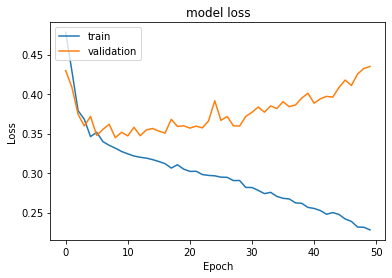

In [68]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Unfortunately, from the above plot we observe that there is a lot of noise in the model, and it and seems to have overfitted on the training data because there is a significant difference in performance between train and validation.

Best Threshold=0.184254, G-Mean=0.746


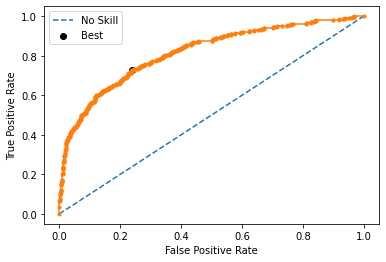

In [69]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test_normalized)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = True Positive / (True Positive + False Negative)

Specificity = True Negative / (False Positive + True Negative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score(), 

and select the threshold with the **largest G-Mean value.**

In [70]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test_normalized)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

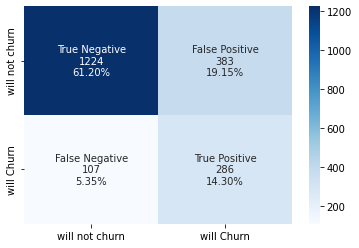

In [71]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_e1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'will not churn','will Churn']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [72]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1607
           1       0.43      0.73      0.54       393

    accuracy                           0.76      2000
   macro avg       0.67      0.74      0.69      2000
weighted avg       0.82      0.76      0.78      2000



As the number of layers in the neural network has increased, we can see that the recall and F1 score has increased, and the False Negative percentage has decreased.

Now let's try to use the Batch Normalization technique and check to see if we can increase the recall and F1 score.

### Model 3

In [73]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [74]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))

In [75]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [76]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [77]:
history_2 = model2.fit(X_train_normalized,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 2s 6ms/step - loss: 0.4963 - accuracy: 0.7705 - val_loss: 0.5318 - val_accuracy: 0.8050
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4079 - accuracy: 0.8267 - val_loss: 0.4567 - val_accuracy: 0.8075
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3762 - accuracy: 0.8420 - val_loss: 0.4131 - val_accuracy: 0.8238
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3578 - accuracy: 0.8492 - val_loss: 0.3785 - val_accuracy: 0.8375
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3529 - accuracy: 0.8530 - val_loss: 0.3696 - val_accuracy: 0.8438
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3471 - accuracy: 0.8558 - val_loss: 0.3628 - val_accuracy: 0.8600
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3419 - accuracy: 0.8548 - val_loss: 0.3610 - val_accuracy: 0.8531
Epoch 

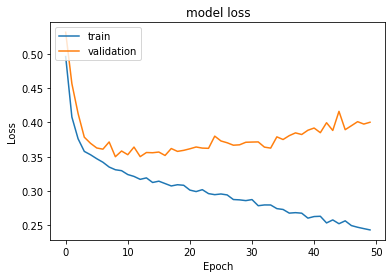

In [78]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

We observet that the data is still overfit the training data since there is huge difference in performance between train and validation.

Best Threshold=0.152800, G-Mean=0.748


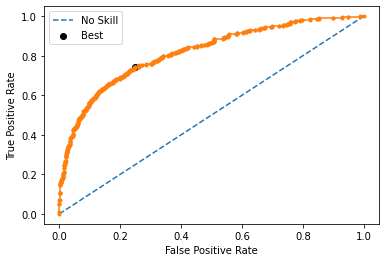

In [79]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test_normalized)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [80]:
y_pred_e2=model2.predict(X_test_normalized)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

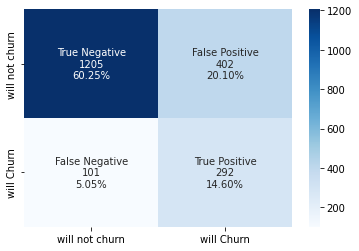

In [81]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_e2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'will not churn','will Churn']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [82]:
#Accuracy as per the classification report 
from sklearn import metrics
cr2=metrics.classification_report(y_test,y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1607
           1       0.42      0.74      0.54       393

    accuracy                           0.75      2000
   macro avg       0.67      0.75      0.68      2000
weighted avg       0.82      0.75      0.77      2000



The Train and Validation curves seem to show overfitting despite having a good recall and F1 score with a low False Negative rate.

Let's try to use the Dropout technique and check to see if it can reduce the False Negative rate.

### Model 4

In [83]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [84]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [85]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3584      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [86]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [87]:
history_3 = model3.fit(X_train_normalized,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 0.4981 - accuracy: 0.7853 - val_loss: 0.4561 - val_accuracy: 0.7987
Epoch 2/50
100/100 [==============================] - 0s 5ms/step - loss: 0.4607 - accuracy: 0.7933 - val_loss: 0.4314 - val_accuracy: 0.8000
Epoch 3/50
100/100 [==============================] - 0s 5ms/step - loss: 0.4448 - accuracy: 0.8055 - val_loss: 0.4108 - val_accuracy: 0.8331
Epoch 4/50
100/100 [==============================] - 0s 5ms/step - loss: 0.4293 - accuracy: 0.8205 - val_loss: 0.4034 - val_accuracy: 0.8388
Epoch 5/50
100/100 [==============================] - 0s 5ms/step - loss: 0.4055 - accuracy: 0.8292 - val_loss: 0.3905 - val_accuracy: 0.8450
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4012 - accuracy: 0.8300 - val_loss: 0.3745 - val_accuracy: 0.8469
Epoch 7/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3755 - accuracy: 0.8447 - val_loss: 0.3587 - val_accuracy: 0.8569
Epoch 

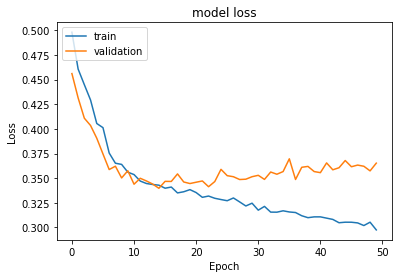

In [88]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that validation curve shows better result than our previous model.

Best Threshold=0.251751, G-Mean=0.765


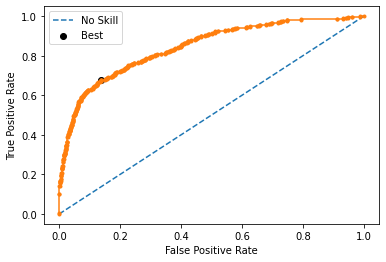

In [89]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test_normalized)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [90]:
y_pred_e3=model3.predict(X_test_normalized)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

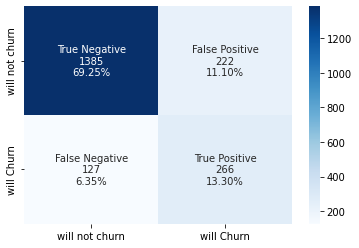

In [91]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_e3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'will not churn','will Churn']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [92]:
#Accuracy as per the classification report 
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1607
           1       0.55      0.68      0.60       393

    accuracy                           0.83      2000
   macro avg       0.73      0.77      0.75      2000
weighted avg       0.84      0.83      0.83      2000



The Dropout technique helped the model reduce the loss function in validation with good accuracy. The recall and F1 score also seems to be fine but there is increase in the False Negative rate.

Now, let's try to use some of the Hyperparameter Optimization techniques we have learnt, such as RandomizedSearchCV, GridSearchCV and Keras Tuner to increase the F1 score of the model.

### Model 5

#### **Random Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [93]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [94]:
def create_model_v4(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We are using Random search to optimize two hyperparameters - **Batch size** & **Learning Rate**.

You can also optimize other hyperparameters as mentioned above.



In [95]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

In [96]:
random_result = random.fit(X_train_normalized, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 2s 5ms/step - loss: 0.6122 - accuracy: 0.7880 - val_loss: 0.5050 - val_accuracy: 0.7987
Best: 0.794500 using {'lr': 0.1, 'batch_size': 32}


The best model is with the following configuration: 

( It may vary each time the code runs ) 

**Result of Random Search**

{'batch_size': 32, 'learning_rate": 0.1}

Let's create the final model with the above mentioned configuration

In [97]:
estimator_v4=create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3584      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [98]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator_v4.fit(X_train_normalized, y_train, epochs=50, batch_size = 32, verbose=1,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 2s 5ms/step - loss: 0.7576 - accuracy: 0.7884 - val_loss: 0.5050 - val_accuracy: 0.7987
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5275 - accuracy: 0.7925 - val_loss: 0.5030 - val_accuracy: 0.7987
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5107 - accuracy: 0.7936 - val_loss: 0.5024 - val_accuracy: 0.7987
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5138 - accuracy: 0.7928 - val_loss: 0.5024 - val_accuracy: 0.7987
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5104 - accuracy: 0.7934 - val_loss: 0.5107 - val_accuracy: 0.7987
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5134 - accuracy: 0.7934 - val_loss: 0.5028 - val_accuracy: 0.7987
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5111 - accuracy: 0.7934 - val_loss: 0.5022 - val_accuracy: 0.7987
Epoch 

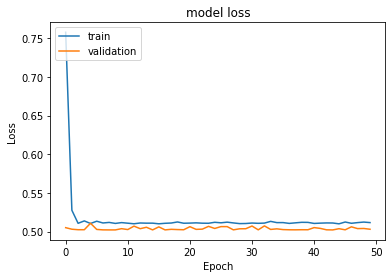

In [99]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is noise in the training behavior of the model.

Best Threshold=1.184929, G-Mean=0.000


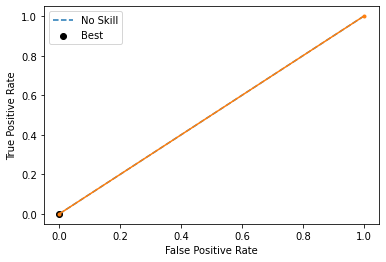

In [100]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_test_normalized)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [101]:
y_pred_e4=estimator_v4.predict(X_test_normalized)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

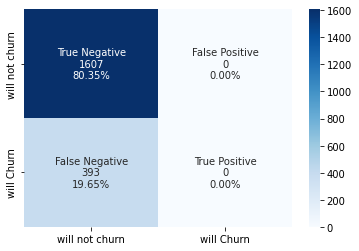

In [102]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_e4)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'will not churn','will Churn']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [103]:
#Accuracy as per the classification report 
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



Hyperparameter tuning is used here to get a better recall and F1 score, but the scores may differ each time.

Other hyperparameters can also be tuned to get better performance on the metrics.

Here, the recall and F1 score of the model has decreased a lot in comparison to the previous best performance, as Random Search CV will choose the hyperparameters randomly, and hence has a very low chance of finding a highly optimal configuration.

Let's use the more exhaustive Grid Search CV and see if the recall and F1 score increases.

### Model 6

#### **Grid Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [104]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [105]:
def create_model_v5(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We're using Grid Search to optimize two hyperparameters - **Batch Size** & **Learning Rate**. 

You can also optimize the other hyperparameters as mentioned above.

In [106]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [107]:
import time
  
# store starting time
begin = time.time()


grid_result = grid.fit(X_train_normalized, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 2s 5ms/step - loss: 0.4851 - accuracy: 0.7933 - val_loss: 0.4268 - val_accuracy: 0.8188
Best: 0.797374 using {'batch_size': 32, 'lr': 0.01}
Total runtime of the program is 37.49469542503357


The best model has the following configuration: 

( It may vary each time the code runs )

**Result of Grid Search**

{'batch_size': 64, 'learning_rate": 0.01}

Let's create the final model with the above mentioned configuration

In [108]:
estimator_v5=create_model_v5(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3584      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [109]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_5=estimator_v5.fit(X_train_normalized, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 2s 6ms/step - loss: 0.4860 - accuracy: 0.7928 - val_loss: 0.4313 - val_accuracy: 0.8169
Epoch 2/50
100/100 [==============================] - 0s 5ms/step - loss: 0.4531 - accuracy: 0.8131 - val_loss: 0.4462 - val_accuracy: 0.8188
Epoch 3/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4336 - accuracy: 0.8144 - val_loss: 0.3969 - val_accuracy: 0.8519
Epoch 4/50
100/100 [==============================] - 0s 5ms/step - loss: 0.4046 - accuracy: 0.8366 - val_loss: 0.4074 - val_accuracy: 0.8169
Epoch 5/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3935 - accuracy: 0.8367 - val_loss: 0.3874 - val_accuracy: 0.8369
Epoch 6/50
100/100 [==============================] - 0s 5ms/step - loss: 0.4040 - accuracy: 0.8313 - val_loss: 0.3948 - val_accuracy: 0.8400
Epoch 7/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3834 - accuracy: 0.8436 - val_loss: 0.3549 - val_accuracy: 0.8562
Epoch 

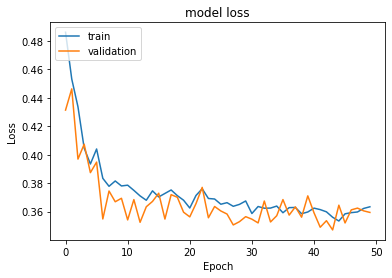

In [110]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that both curves - train and validation, are smooth.

Best Threshold=0.352653, G-Mean=0.767


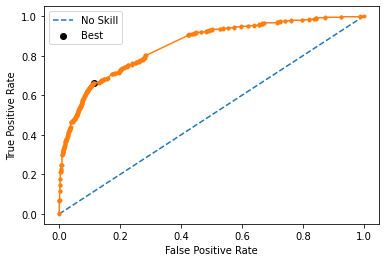

In [111]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat5 = estimator_v5.predict(X_test_normalized)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [112]:
y_pred_e5=estimator_v5.predict(X_test_normalized)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

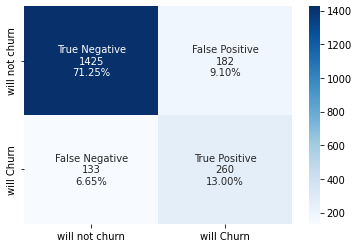

In [113]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_e5)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'will not churn','will Churn']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [114]:
#Accuracy as per the classification report 
from sklearn import metrics
cr5=metrics.classification_report(y_test,y_pred_e5)
print(cr5)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1607
           1       0.59      0.66      0.62       393

    accuracy                           0.84      2000
   macro avg       0.75      0.77      0.76      2000
weighted avg       0.85      0.84      0.85      2000



Hyperparameter tuning with Grid Search has been used here to get a better F1 score, but the F1 score might differ each time.

Other hyperparameters can also be tuned to get better metrics.

Here, the F1 score of the model is better than Model 4 (the Dropout model).

### Dask

* There is also another library called Dask, sometimes used in the industry to provide a performance boost to Hyperparameter Tuning due to its parallelized computing procedure. 
* Dask also has the option of implementing Grid Search similar to the Grid Search in Scikit-learn. 

You may install the Dask library in Anaconda prompt using the below code:
* !pip install dask-ml --user

In [115]:
# Try below code to install dask in Google Colab
!pip install dask-ml 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 148 kB 5.3 MB/s 


In [116]:
# importing library
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV

In [117]:
def create_model_v6(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [118]:
keras_estimator = KerasClassifier(build_fn=create_model_v6, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
dask = DaskGridSearchCV(estimator=keras_estimator, 
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [119]:
import time
  
# store starting time
begin = time.time()


dask_result = dask.fit(X_train_normalized, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (dask_result.best_score_, dask_result.best_params_))
means = dask_result.cv_results_['mean_test_score']
stds = dask_result.cv_results_['std_test_score']
params = dask_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

100/100 [==============================] - 1s 6ms/step - loss: 0.4970 - accuracy: 0.7902 - val_loss: 0.4574 - val_accuracy: 0.7987
Best: 0.794500 using {'batch_size': 64, 'lr': 0.001}
Total runtime of the program is 72.30786776542664


Unfortunately, Dask took more time to run the model when compared to Grid Search CV, and this is because Dask has some requirements to perform well:

* The dimension of the dataset should be large.
* Dask shows a significant performance improvement in computation when the number and range of hyperparameters we are tuning is large.

Since the dataset dimensions and hyperparameter number/range were small for this example, Dask couldn't show a significant improvement.

We can also use another optimization technique - Keras Tuner.

In [120]:
## Install Keras Tuner
!pip install keras-tuner 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.2 MB/s 
     |████████████████████████████████| 1.6 MB 42.9 MB/s 


### Keras Tuner

In [121]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [122]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

**Hyperparameters**
* How many hidden layers should the model have?
* How many neurons should the model have in each hidden layer?
* Learning Rate

In [123]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

Initialize a tuner (here, RandomSearch). We use objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.

In [124]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

In [125]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [126]:
### Searching the best model on X and y train
tuner.search(X_train_normalized, y_train,
             epochs=5,
             validation_split = 0.2)

Trial 5 Complete [00h 00m 27s]
val_accuracy: 0.831458330154419

Best val_accuracy So Far: 0.8589583237965902
Total elapsed time: 00h 02m 45s


In [127]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in ./Job_
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.8589583237965902
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.856458326180776
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.8545833230018616
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.831458330154419
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
units

### Model 7

* Let's create a model with the above mentioned best configuration given by Keras Tuner.

In [128]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [129]:
model7 = Sequential()
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))

In [130]:
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               2240      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,985
Trainable params: 121,985
Non-trai

In [131]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [132]:
history_7 = model7.fit(X_train_normalized,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 2s 12ms/step - loss: 0.4754 - accuracy: 0.7972 - val_loss: 0.4242 - val_accuracy: 0.8213
Epoch 2/50
100/100 [==============================] - 1s 10ms/step - loss: 0.4108 - accuracy: 0.8255 - val_loss: 0.3901 - val_accuracy: 0.8300
Epoch 3/50
100/100 [==============================] - 1s 11ms/step - loss: 0.3736 - accuracy: 0.8456 - val_loss: 0.3730 - val_accuracy: 0.8388
Epoch 4/50
100/100 [==============================] - 1s 11ms/step - loss: 0.3658 - accuracy: 0.8522 - val_loss: 0.3868 - val_accuracy: 0.8338
Epoch 5/50
100/100 [==============================] - 1s 10ms/step - loss: 0.3501 - accuracy: 0.8530 - val_loss: 0.3663 - val_accuracy: 0.8562
Epoch 6/50
100/100 [==============================] - 1s 10ms/step - loss: 0.3491 - accuracy: 0.8533 - val_loss: 0.3581 - val_accuracy: 0.8594
Epoch 7/50
100/100 [==============================] - 1s 12ms/step - loss: 0.3483 - accuracy: 0.8541 - val_loss: 0.3589 - val_accuracy: 0.8519

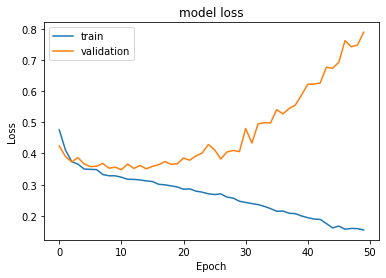

In [133]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that the train curve is smooth but losses in validation increases as epoch increases.

Best Threshold=0.155358, G-Mean=0.736


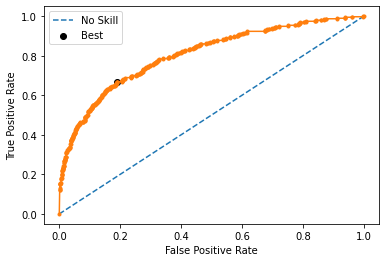

In [134]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat7 = model7.predict(X_test_normalized)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [135]:
y_pred_e7=model7.predict(X_test_normalized)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

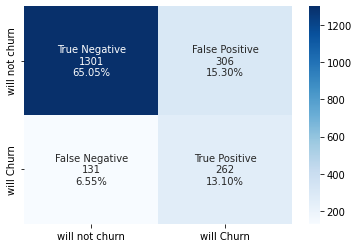

In [136]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_e7)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'will not churn','will Churn']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [137]:
#Accuracy as per the classification report 
from sklearn import metrics
cr7=metrics.classification_report(y_test,y_pred_e7)
print(cr7)

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1607
           1       0.46      0.67      0.55       393

    accuracy                           0.78      2000
   macro avg       0.68      0.74      0.70      2000
weighted avg       0.82      0.78      0.80      2000



* After using the suggested hyperparameters from Keras Tuner, the F1 score has decreased than our best models, and the False Negative rate is similar to the previous optimization technique model.

* Further, you can add Batch Normalization and Dropout to the model and check the F1 score. 
* Let's try to apply SMOTE to balance this dataset and then apply hyperparamter tuning accordingly.

### SMOTE + Keras Tuner

In [138]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train_normalized,y_train)

In [139]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [140]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [141]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Job_Switch')

In [142]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [143]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

Trial 5 Complete [00h 00m 36s]
val_accuracy: 0.6306199828783671

Best val_accuracy So Far: 0.7986630002657572
Total elapsed time: 00h 02m 40s


In [144]:
tuner_2.results_summary()

Results summary
Results in ./Job_Switch
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.7986630002657572
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.7706121404965719
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.7674662470817566
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.6498885750770569
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160


In [145]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [146]:
model9 = Sequential()
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model9.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [147]:
model9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               2240      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,985
Trainable params: 121,985
Non-trai

In [148]:
history_9 = model9.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
159/159 [==============================] - 2s 8ms/step - loss: 0.5376 - accuracy: 0.7262 - val_loss: 0.9206 - val_accuracy: 0.4809
Epoch 2/50
159/159 [==============================] - 1s 6ms/step - loss: 0.4580 - accuracy: 0.7823 - val_loss: 0.7540 - val_accuracy: 0.6032
Epoch 3/50
159/159 [==============================] - 1s 6ms/step - loss: 0.4333 - accuracy: 0.7953 - val_loss: 0.6561 - val_accuracy: 0.6193
Epoch 4/50
159/159 [==============================] - 1s 6ms/step - loss: 0.4165 - accuracy: 0.8052 - val_loss: 0.5302 - val_accuracy: 0.7153
Epoch 5/50
159/159 [==============================] - 1s 7ms/step - loss: 0.4037 - accuracy: 0.8114 - val_loss: 0.8816 - val_accuracy: 0.5049
Epoch 6/50
159/159 [==============================] - 2s 10ms/step - loss: 0.3981 - accuracy: 0.8109 - val_loss: 0.5133 - val_accuracy: 0.7369
Epoch 7/50
159/159 [==============================] - 2s 13ms/step - loss: 0.3871 - accuracy: 0.8210 - val_loss: 0.4611 - val_accuracy: 0.7617
Epoc

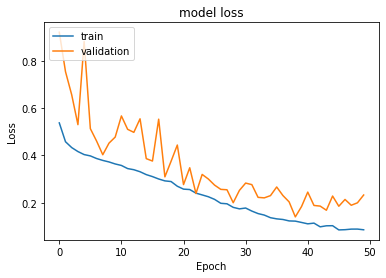

In [149]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that Train and validation curves are smooth than our previous model.

Best Threshold=0.001563, G-Mean=0.687


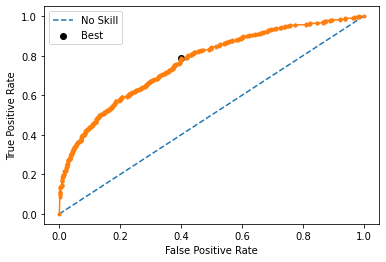

In [150]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat9 = model9.predict(X_test_normalized)
# keep probabilities for the positive outcome only
yhat9 = yhat9[:, 0]
# calculate roc curves
fpr, tpr, thresholds9 = roc_curve(y_test, yhat9)
# calculate the g-mean for each threshold
gmeans9 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans9)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds9[ix], gmeans9[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [151]:
y_pred_e9=model9.predict(X_test_normalized)
y_pred_e9 = (y_pred_e9 > thresholds9[ix])
y_pred_e9

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

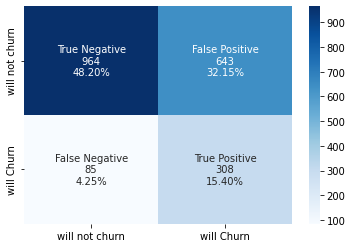

In [152]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_e9)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'will not churn','will Churn']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [153]:
#Accuracy as per the classification report 
from sklearn import metrics
cr6=metrics.classification_report(y_test,y_pred_e9)
print(cr6)

              precision    recall  f1-score   support

           0       0.92      0.60      0.73      1607
           1       0.32      0.78      0.46       393

    accuracy                           0.64      2000
   macro avg       0.62      0.69      0.59      2000
weighted avg       0.80      0.64      0.67      2000



After applying the SMOTE technique to the data, the F1 score is decreased but recall score is increased, and the False Negative rate decreased, but if you see the loss curves of train and validation, the model seems to have overfit.

Let's use Grid Search CV and see if we can increase the model's performance on the metrics.

In [154]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [155]:
def create_model_v7(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [156]:
keras_estimator = KerasClassifier(build_fn=create_model_v7, verbose=1)

In [157]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(X_train_normalized, y_train,validation_split=0.2,verbose=1) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 2s 5ms/step - loss: 0.4933 - accuracy: 0.7883 - val_loss: 0.4470 - val_accuracy: 0.7987


In [158]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.796250 using {'batch_size': 32, 'lr': 0.001}


In [159]:
estimator_v7=create_model_v7(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3584      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [160]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_7=estimator_v7.fit(X_sm, y_sm, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
318/318 [==============================] - 2s 5ms/step - loss: 0.5983 - accuracy: 0.6796 - val_loss: 0.9172 - val_accuracy: 0.4109
Epoch 2/50
318/318 [==============================] - 1s 4ms/step - loss: 0.5387 - accuracy: 0.7298 - val_loss: 0.7878 - val_accuracy: 0.5482
Epoch 3/50
318/318 [==============================] - 1s 4ms/step - loss: 0.4898 - accuracy: 0.7669 - val_loss: 0.5991 - val_accuracy: 0.6516
Epoch 4/50
318/318 [==============================] - 1s 4ms/step - loss: 0.4662 - accuracy: 0.7782 - val_loss: 0.5541 - val_accuracy: 0.6956
Epoch 5/50
318/318 [==============================] - 1s 4ms/step - loss: 0.4546 - accuracy: 0.7830 - val_loss: 0.7764 - val_accuracy: 0.5403
Epoch 6/50
318/318 [==============================] - 1s 4ms/step - loss: 0.4467 - accuracy: 0.7928 - val_loss: 0.5810 - val_accuracy: 0.6693
Epoch 7/50
318/318 [==============================] - 1s 4ms/step - loss: 0.4407 - accuracy: 0.7948 - val_loss: 0.5814 - val_accuracy: 0.6571
Epoch 

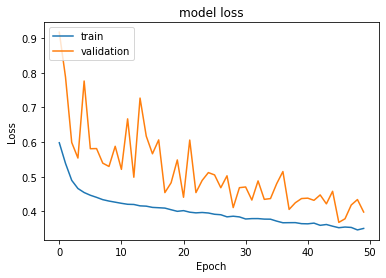

In [161]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we observe that there is a lot of noise in the model. 

Grid Search CV also does not seem to work that well on the SMOTE data.

Best Threshold=0.417485, G-Mean=0.765


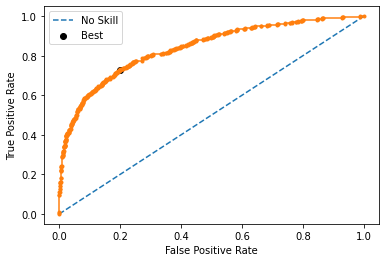

In [162]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat10 = estimator_v7.predict(X_test_normalized)
# keep probabilities for the positive outcome only
yhat10 = yhat10[:, 0]
# calculate roc curves
fpr, tpr, thresholds10 = roc_curve(y_test, yhat10)
# calculate the g-mean for each threshold
gmeans10 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans10)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds10[ix], gmeans10[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [163]:
y_pred_e10=estimator_v7.predict(X_test_normalized)
y_pred_e10 = (y_pred_e10 > thresholds10[ix])
y_pred_e10

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

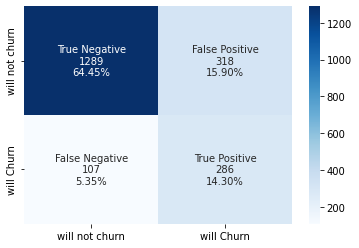

In [164]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_e10)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'will not churn','will Churn']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [165]:
#Accuracy as per the classification report 
from sklearn import metrics
cr10=metrics.classification_report(y_test,y_pred_e10)
print(cr10)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1607
           1       0.47      0.73      0.57       393

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



Oversampling using SMOTE did not help improve the F1 score. 


## Conclusion:

- In this dataset, the SMOTE oversampling technique does not work well, as both the models we tried building have overfitted on the training dataset.
- So, our final model here can be **Model 4**, which uses the Dropout regularization technique and works on the imbalanced dataset.

## Business Recommendations
- The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review its target market or review the strategy for retention between the different age groups.

- About the tenure, the clients on either end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure. Worryingly, the bank is losing customers with significant bank balances which are likely to hit their available capital for lending.

- The proportion of female customers churning is also greater than that of male customers. Interestingly, the majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.

- Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive members is quite high suggesting that the bank may need a program implemented to turn this group into active customers as this will have a positive impact on the customer churn.